# Lendo dados

Escrevendo `;` antes do comando faz o comando ser executado no shell.

Escrevendo `?` antes do comando busca ajuda para o comando

O comando `apropos` busca comandos relacionados à palavra de entrada.

In [1]:
;cat dados.csv | head

Municípios,População 2010,Área da unidade territorial 2015 (km²) 
Abatiá,7764,228.72
Adrianópolis,6376,1349.33
Agudos do Sul,8270,192.26
Almirante Tamandaré,103204,194.74
Altamira do Paraná,4306,386.95
Alto Paraíso,3206,967.77
Alto Paraná,13663,407.72
Alto Piquiri,10179,447.67
Altônia,20516,661.56


In [2]:
apropos("csv")

writecsv
SharedArray{T,N}
readcsv


In [3]:
?readcsv

search: readcsv readchomp



```
readcsv(source, [T::Type]; options...)
```

Equivalent to `readdlm` with `delim` set to comma.


In [4]:
?readdlm

search: readdlm readdir readandwrite



```
readdlm(source, delim::Char, T::Type, eol::Char; header=false, skipstart=0, skipblanks=true, use_mmap, ignore_invalid_chars=false, quotes=true, dims, comments=true, comment_char='#')
```

Read a matrix from the source where each line (separated by `eol`) gives one row, with elements separated by the given delimeter. The source can be a text file, stream or byte array. Memory mapped files can be used by passing the byte array representation of the mapped segment as source.

If `T` is a numeric type, the result is an array of that type, with any non-numeric elements as `NaN` for floating-point types, or zero. Other useful values of `T` include `ASCIIString`, `AbstractString`, and `Any`.

If `header` is `true`, the first row of data will be read as header and the tuple `(data_cells, header_cells)` is returned instead of only `data_cells`.

Specifying `skipstart` will ignore the corresponding number of initial lines from the input.

If `skipblanks` is `true`, blank lines in the input will be ignored.

If `use_mmap` is `true`, the file specified by `source` is memory mapped for potential speedups. Default is `true` except on Windows. On Windows, you may want to specify `true` if the file is large, and is only read once and not written to.

If `ignore_invalid_chars` is `true`, bytes in `source` with invalid character encoding will be ignored. Otherwise an error is thrown indicating the offending character position.

If `quotes` is `true`, column enclosed within double-quote (") characters are allowed to contain new lines and column delimiters. Double-quote characters within a quoted field must be escaped with another double-quote.  Specifying `dims` as a tuple of the expected rows and columns (including header, if any) may speed up reading of large files.  If `comments` is `true`, lines beginning with `comment_char` and text following `comment_char` in any line are ignored.

```
readdlm(source, T::Type; options...)
```

The columns are assumed to be separated by one or more whitespaces. The end of line delimiter is taken as `n`.

```
readdlm(source, delim::Char, T::Type; options...)
```

The end of line delimiter is taken as `n`.

```
readdlm(source, delim::Char, eol::Char; options...)
```

If all data is numeric, the result will be a numeric array. If some elements cannot be parsed as numbers, a cell array of numbers and strings is returned.

```
readdlm(source, delim::Char; options...)
```

The end of line delimiter is taken as `n`. If all data is numeric, the result will be a numeric array. If some elements cannot be parsed as numbers, a cell array of numbers and strings is returned.

```
readdlm(source; options...)
```

The columns are assumed to be separated by one or more whitespaces. The end of line delimiter is taken as `n`. If all data is numeric, the result will be a numeric array. If some elements cannot be parsed as numbers, a cell array of numbers and strings is returned.


In [5]:
readcsv("dados.csv")

400x3 Array{Any,2}:
 "Municípios"           …      "Área da unidade territorial 2015 (km²) "
 "Abatiá"                   228.72                                      
 "Adrianópolis"            1349.33                                      
 "Agudos do Sul"            192.26                                      
 "Almirante Tamandaré"      194.74                                      
 "Altamira do Paraná"   …   386.95                                      
 "Alto Paraíso"             967.77                                      
 "Alto Paraná"              407.72                                      
 "Alto Piquiri"             447.67                                      
 "Altônia"                  661.56                                      
 "Alvorada do Sul"      …   424.25                                      
 "Amaporã"                  384.74                                      
 "Ampére"                   298.35                                      
 ⋮                      ⋱      

In [6]:
dados, cabeca = readcsv("dados.csv", header=true)

(
399x3 Array{Any,2}:
 "Abatiá"                 7764   228.72
 "Adrianópolis"           6376  1349.33
 "Agudos do Sul"          8270   192.26
 "Almirante Tamandaré"  103204   194.74
 "Altamira do Paraná"     4306   386.95
 "Alto Paraíso"           3206   967.77
 "Alto Paraná"           13663   407.72
 "Alto Piquiri"          10179   447.67
 "Altônia"               20516   661.56
 "Alvorada do Sul"       10283   424.25
 "Amaporã"                5443   384.74
 "Ampére"                17308   298.35
 "Anahy"                  2874   102.65
 ⋮                                     
 "Ubiratã"               21558   652.58
 "Umuarama"             100676  1232.77
 "União da Vitória"      52735   720   
 "Uniflor"                2466    94.82
 "Uraí"                  11472   237.81
 "Ventania"               9957   759.37
 "Vera Cruz do Oeste"     8973   327.09
 "Verê"                   7878   311.8 
 "Virmond"                3950   243.17
 "Vitorino"               6513   308.22
 "Wenceslau Braz" 

In [7]:
using Plots
pyplot()

Plots.PyPlotBackend()


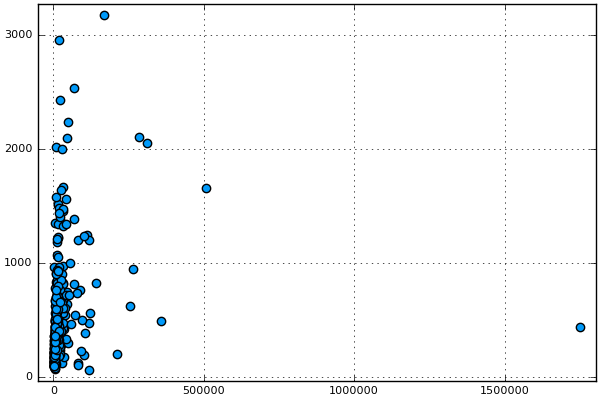

In [81]:
cidades = dados[:,1]
pop = map(Float64,dados[:,2])
area = map(Float64,dados[:,3]) 
scatter(pop, area, leg=false)


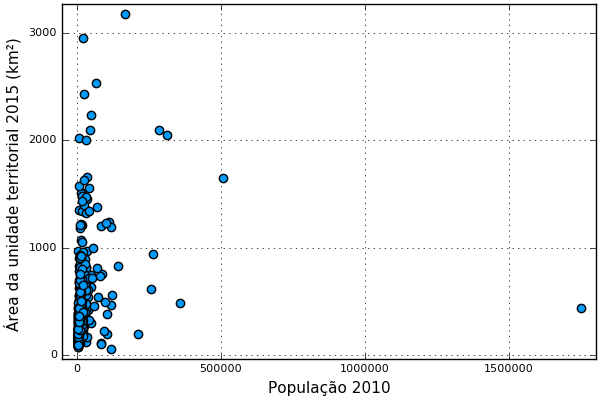

In [82]:
xlabel!(cabeca[2])
ylabel!(cabeca[3])

In [83]:
# Densidade = População / Área
dens = pop / area # ?

399x399 Array{Float64,2}:
 0.00984133  0.0580588  0.00827254  …  0.013262    0.0171216   0.0154776 
 0.00808196  0.0476794  0.00679362     0.0108911   0.0140607   0.0127106 
 0.0104827   0.0618426  0.00881168     0.0141264   0.0182375   0.0164863 
 0.130817    0.771754   0.109964       0.176288    0.227592    0.205737  
 0.00545811  0.0322     0.00458804     0.00735528  0.00949585  0.00858402
 0.0040638   0.0239743  0.00341599  …  0.00547632  0.00707007  0.00639117
 0.0173187   0.102171   0.0145579      0.0233384   0.0301305   0.0272372 
 0.0129025   0.076118   0.0108457      0.0173872   0.0224474   0.0202919 
 0.0260053   0.153418   0.0218598      0.0350443   0.0452431   0.0408987 
 0.0130343   0.0768957  0.0109565      0.0175649   0.0226767   0.0204992 
 0.00689933  0.0407025  0.00579951  …  0.00929744  0.0120032   0.0108506 
 0.0219389   0.129428   0.0184417      0.0295646   0.0381687   0.0345035 
 0.00364297  0.0214916  0.00306224     0.00490921  0.00633792  0.00572933
 ⋮          

In [84]:
dens = pop ./ area

399-element Array{Float64,1}:
  33.9454 
   4.72531
  43.0147 
 529.958  
  11.1281 
   3.31277
  33.5107 
  22.7377 
  31.0115 
  24.2381 
  14.1472 
  58.0124 
  27.9981 
   ⋮      
  33.035  
  81.6665 
  73.2431 
  26.0072 
  48.2402 
  13.1122 
  27.4328 
  25.2662 
  16.2438 
  21.131  
  48.4972 
  16.7135 

In [85]:
# Histograma da densidade
histogram(dens, nbins=100)
xlabel!("Densidade (hab/km²)")

# Lista das cidades e suas densidades

## Usando matriz

In [86]:
M = [cidades dens]

399x2 Array{Any,2}:
 "Abatiá"                33.9454 
 "Adrianópolis"           4.72531
 "Agudos do Sul"         43.0147 
 "Almirante Tamandaré"  529.958  
 "Altamira do Paraná"    11.1281 
 "Alto Paraíso"           3.31277
 "Alto Paraná"           33.5107 
 "Alto Piquiri"          22.7377 
 "Altônia"               31.0115 
 "Alvorada do Sul"       24.2381 
 "Amaporã"               14.1472 
 "Ampére"                58.0124 
 "Anahy"                 27.9981 
 ⋮                               
 "Ubiratã"               33.035  
 "Umuarama"              81.6665 
 "União da Vitória"      73.2431 
 "Uniflor"               26.0072 
 "Uraí"                  48.2402 
 "Ventania"              13.1122 
 "Vera Cruz do Oeste"    27.4328 
 "Verê"                  25.2662 
 "Virmond"               16.2438 
 "Vitorino"              21.131  
 "Wenceslau Braz"        48.4972 
 "Xambrê"                16.7135 

In [87]:
?writecsv

search: writecsv



```
writecsv(filename, A)
```

Equivalent to `writedlm` with `delim` set to comma.


In [88]:
writecsv("densidades.csv", M)

In [89]:
;cat densidades.csv | head

Abatiá,33.945435466946485
Adrianópolis,4.725308115879733
Agudos do Sul,43.01466763757412
Almirante Tamandaré,529.957892574715
Altamira do Paraná,11.128052719989663
Alto Paraíso,3.3127705963193734
Alto Paraná,33.510742666535855
Alto Piquiri,22.737730917863605
Altônia,31.011548461212893
Alvorada do Sul,24.238067177371832


## Usando laços

In [90]:
N = length(cidades)
open("densidades2.csv", "w") do f
    for i = 1:N
        write(f, "$(cidades[i]),$(dens[i])\n")
    end
end

In [91]:
;cat densidades2.csv | head

Abatiá,33.945435466946485
Adrianópolis,4.725308115879733
Agudos do Sul,43.01466763757412
Almirante Tamandaré,529.957892574715
Altamira do Paraná,11.128052719989663
Alto Paraíso,3.3127705963193734
Alto Paraná,33.510742666535855
Alto Piquiri,22.737730917863605
Altônia,31.011548461212893
Alvorada do Sul,24.238067177371832


Se quisermos apenas ver, podemos omitir `open` e usar `println`

In [92]:
for i = 1:N
    println("$(cidades[i]),$(dens[i])")
end

Abatiá,33.945435466946485
Adrianópolis,4.725308115879733
Agudos do Sul,43.01466763757412
Almirante Tamandaré,529.957892574715
Altamira do Paraná,11.128052719989663
Alto Paraíso,3.3127705963193734
Alto Paraná,33.510742666535855
Alto Piquiri,22.737730917863605
Altônia,31.011548461212893
Alvorada do Sul,24.238067177371832
Amaporã,14.147216301918178
Ampére,58.012401541813304
Anahy,27.9980516317584
Andirá,87.30091494408674
Ângulo,26.966610073571026
Antonina,21.410599329041617
Antônio Olinto,15.653081214599037
Apucarana,216.5493651390605
Arapongas,272.4870493433101
Arapoti,19.004182316665318
Arapuã,16.382205456134702
Araruna,27.208580871469415
Araucária,253.86369448469867
Ariranha do Ivaí,10.23960594423109
Assaí,37.13863971840581
Assis Chateaubriand,34.060788580740315
Astorga,56.80443432461648
Atalaia,28.425105331977335
Balsa Nova,32.38471899807984
Bandeirantes,72.2927289471911
Barbosa Ferraz,23.496212683796227
Barra do Jacaré,23.565502938126514
Barracão,56.79696616102684
Bela Vista da Carob

A primeira maneira é muito mais simples, a priori,
mas a segunda dá mais liberdade. Note que podemos
calcular a densidade dentro do laço.

## Qual a cidade com maior densidade?

In [93]:
?maximum

search: maximum maximum!



```
maximum(A, dims)
```

Compute the maximum value of an array over the given dimensions.

```
maximum(itr)
```

Returns the largest element in a collection.


In [94]:
maximum(dens)

4027.002114748069

Mas qual a cidade?

In [95]:
?indmax

search: indmax findmax invdigamma



```
indmax(itr) -> Integer
```

Returns the index of the maximum element in a collection.


In [96]:
indmax(dens)

95

In [97]:
cidades[95]

"Curitiba"

## Ordenando essa lista

In [98]:
?sortrows

search: sortrows



```
sortrows(A, [alg=<algorithm>,] [by=<transform>,] [lt=<comparison>,] [rev=false])
```

Sort the rows of matrix `A` lexicographically.


In [99]:
M = sortrows(M, by=x->x[2])

399x2 Array{Any,2}:
 "Alto Paraíso"                3.31277
 "Guaraqueçaba"                3.89636
 "Coronel Domingos Soares"     4.592  
 "Adrianópolis"                4.72531
 "Tibagi"                      6.5538 
 "Doutor Ulysses"              7.32868
 "Luiziana"                    8.05085
 "Reserva do Iguaçu"           8.75898
 "Campina do Simão"            9.08969
 "Nova Laranjeiras"            9.28847
 "Céu Azul"                    9.35351
 "Tunas do Paraná"             9.35854
 "Serranópolis do Iguaçu"      9.46952
 ⋮                                    
 "Arapongas"                 272.487  
 "São José dos Pinhais"      279.162  
 "Londrina"                  306.614  
 "Piraquara"                 410.531  
 "Foz do Iguaçu"             414.147  
 "Almirante Tamandaré"       529.958  
 "Fazenda Rio Grande"        699.991  
 "Maringá"                   733.142  
 "Sarandi"                   800.764  
 "Colombo"                  1076.73   
 "Pinhais"                  1922.26   
 "Cur

# Condicional

````julia
if CONDIÇÃO
    ALGO
elseif OUTRAS CONDIÇÕES
    ALGO
else
    ALGO
end
````

In [100]:
x = -2
if x > 0
    println("oi")
elseif x == 0
    println("que")
else
    println("tchau")
end

tchau


# Filtrando

Vamos considerar apenas as cidades que tem menos que 3000 habitantes.
Daí calculamos a densidade populacional e fazemos o histograma.

In [101]:
N = length(pop)
for i = 1:N
    if pop[i] < 3000
        println("$(cidades[i]) $(pop[i]/area[i])")
    end
end

Anahy 27.9980516317584
Ângulo 26.966610073571026
Ariranha do Ivaí 10.23960594423109
Barra do Jacaré 23.565502938126514
Boa Esperança do Iguaçu 18.20816864295125
Cafeara 14.504843918191604
Esperança Nova 14.217667436489608
Flórida 30.62010836845274
Guaporema 11.031568481232911
Iguatu 20.890218814288385
Inajá 15.346687211093991
Iracema do Oeste 31.616384596517044
Jardim Olinda 10.963274198568316
Mirador 10.495692571377024
Miraselva 20.622438808284414
Nova Aliança do Ivaí 10.901196008227316
Novo Itacolomi 17.514404312000497
Paranapoema 15.868774164202867
Pinhal de São Bento 26.934126821260005
Pitangueiras 22.83534853525927
Porto Rico 11.622565233370084
Rancho Alegre d`Oeste 11.794191971498405
Santa Inês 13.128249566724438
Santo Antônio do Caiuá 12.44807595745652
Santo Antônio do Paraíso 14.514767932489452
São Manoel do Paraná 21.996225623820507
São Pedro do Paraná 9.938160781966886
Uniflor 26.007171482809536



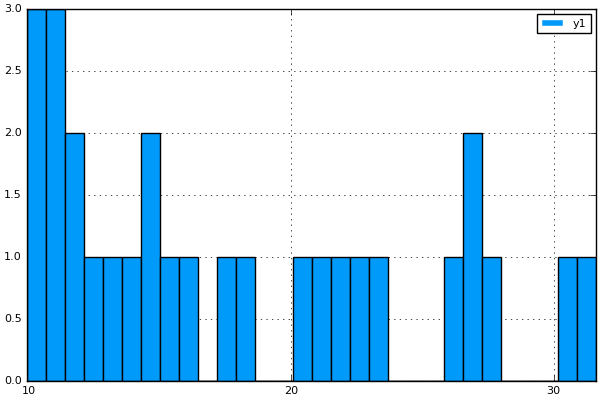

In [102]:
selecao = []
for i = 1:N
    if pop[i] < 3000
        push!(selecao, pop[i]/area[i])
    end
end
histogram(selecao)

E se eu quiser histograma da área aquelas com as com densidade menor que 20 hab/km$^2$?

In [103]:
selecao = []
for i = 1:N
    if pop[i]/area[i] < 20
        push!(selecao, area[i])
    end
end
histogram(selecao)

Com densidade menor que 20 mas com área maior que 1000,
mas queremos alguma maneira de visualizar as três informações:
População, Área e densidade.

In [104]:
selecao = []
for i = 1:N
    if pop[i]/area[i] < 20 && area[i] > 1000
        push!(selecao, i)
    end
end
println(selecao)
println(cidades[selecao])

Any[2,20,36,63,64,74,75,87,90,125,136,138,203,237,245,270,271,273,303,364,379]
Any["Adrianópolis","Arapoti","Bituruna","Cândido de Abreu","Candói","Cerro Azul","Céu Azul","Coronel Domingos Soares","Cruz Machado","General Carneiro","Guaraniaçu","Guaraqueçaba","Mangueirinha","Nova Laranjeiras","Ortigueira","Pinhão","Piraí do Sul","Pitanga","Reserva","Sengés","Tibagi"]


In [105]:
scatter(pop[selecao], area[selecao])


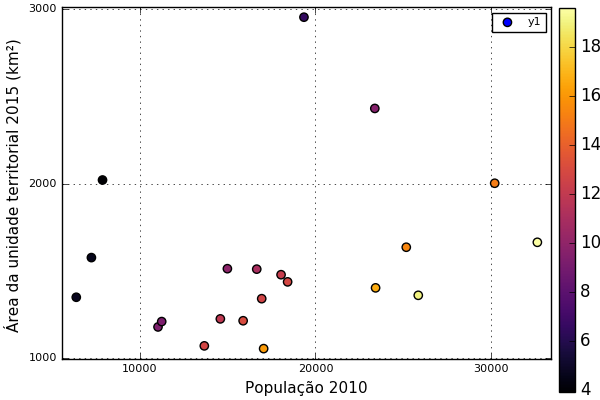

In [106]:
scatter(pop[selecao], area[selecao], zcolor=dens[selecao])
xlabel!(cabeca[2])
ylabel!(cabeca[3])

O comando `find`

In [107]:
?find

search: find findn findnz findin findmin findmax findprev findnext findlast



```
find(f,A)
```

Return a vector of the linear indexes of `A` where `f` returns `true`.

```
find(A)
```

Return a vector of the linear indexes of the non-zeros in `A` (determined by `A[i]!=0`). A common use of this is to convert a boolean array to an array of indexes of the `true` elements.


In [108]:
x = rand(10)

10-element Array{Float64,1}:
 0.907713 
 0.0502367
 0.69566  
 0.7285   
 0.480297 
 0.350662 
 0.955544 
 0.181552 
 0.5312   
 0.907958 

In [109]:
find(x .> 0.5)

6-element Array{Int64,1}:
  1
  3
  4
  7
  9
 10


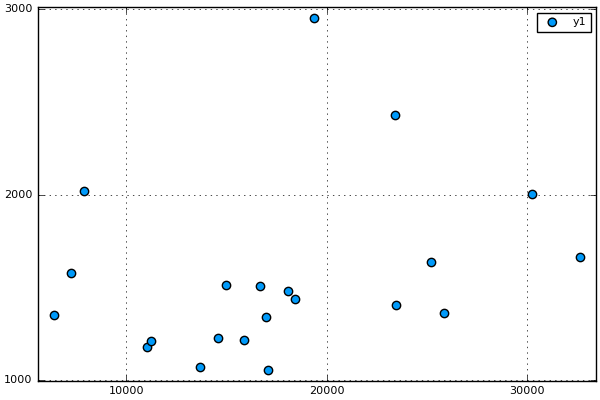

In [110]:
selecao = find((pop./area .< 20) & (area .> 1000))
scatter(pop[selecao], area[selecao])

**Cuidado** com o índice do índice.

In [111]:
x = round(Int, 100*(rand(10) - rand(10)))

10-element Array{Int64,1}:
  86
 -41
 -27
  57
 -39
  51
  47
 -64
  -5
 -10

Quais são positivos? Desses, quais são menores que 50?

In [112]:
positivos = find(x .> 0)

4-element Array{Int64,1}:
 1
 4
 6
 7

In [113]:
menores = find(x[positivos] .< 50)

1-element Array{Int64,1}:
 4

In [114]:
x[menores]

1-element Array{Int64,1}:
 57

In [115]:
x[positivos][menores]

1-element Array{Int64,1}:
 47

`find` é prático, mas pode te enganar. Além disso, pode ser mais lento, dependendo da aplicação.

## Funções estatísticas

Existem pacotes específicos para avaliações estatísticas como as que serão feitas em R.
Algumas coisas básicas aqui.

In [116]:
mean(area)

499.51914786967427

In [117]:
std(area)

450.8032955627397

In [118]:
var(area)

203223.61129022687

# Exercícios

1. Separe todas as cidades cuja área está entre 500 e 1000. Plote o histograma da população destes.
2. Separe as cidades cuja área é menor que a média.
3. Separe as cidades cuja população está até a um desvio padrão de distância da média, i.e.
$|x - \mu| < \sigma$.
4. Crie um vetor aleatório com 10 elementos entre 2 e 3. Faça um plot da função $x^p$ com $x$ entre [0,1] onde $p$ é cada elemento do vetor anterior. Não faça 10 plots manualmente.
5. Crie um vetor x = round(Int, 100*(rand(10)-rand(10))) e encontre os positivos e menores que 50 usando `find`.
6. Crie dois vetores x e y usando
````
x = rand(1:100, 30)
y = rand(1:100, 30)
````
Explique o que isso faz
7. Para cada i = 1:30, selecione aqueles em que x_i é maior que 50, e y_i > x_i. Imprima cada par no formato
````
[1]. (51,55)
[2]. (60,70)
...
````
Note que a numeração da esquerda não é o i (que é o faz ficar interessante).